## Linear Regression with TensorFlow - Predicting house prices
We build a linear regression model to predict house prices in California based on the census data from 1990.

The columns are the following:
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)


---
This notebook is based on:
https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_a_real_dataset.ipynb

In [1]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Google Colabs

[Google Colaboratory=(https://colab.google/) is a hosted Jupyter Notebooks serveice that allows you to access computing resources like CPUs, GPUs, and TPUs. We will use this service to make our first stepd into machince learning, by following an an example that uses ML to predict house prices.

You can find additional information about the service at [Welcome to Colaboratory](https://research.google.com/colaboratory).


## Import relevant modules

First we need to import a set of relevant modules that are necessary for the data analysis and machine learning part of this example.

In [2]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

## Load the dataset


For this example, we will make use of dataset that provides [housing information for the state of California](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv).

In this very fist step, we load the dataset using `Pandas` and summarize the data with the `describe` method.

### Load the .csv file into a pandas DataFrame

This Colab, like many machine learning programs, gathers the .csv file and stores the data in memory as a pandas Dataframe.  Pandas is an open source Python library.  The primary datatype in pandas is a DataFrame.  You can imagine a pandas DataFrame as a spreadsheet in which each row is identified by a number and each column by a name. Pandas is itself built on another open source Python library called NumPy. If you aren't familiar with these technologies, please view these two quick tutorials:

*   [NumPy](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/numpy_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=numpy_tf2-colab&hl=en)
*   [Pandas DataFrames](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en)

The following code cell imports the .csv file into a pandas DataFrame and scales the values in the label (`median_house_value`).

Scaling `median_house_value` puts the value of each house in units of thousands. Scaling will keep loss values and learning rates in a friendlier range.  

Although scaling a label is usually *not* essential, scaling features in a multi-feature model usually *is* essential.

In [3]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
5,-114.6,33.6,29.0,1387.0,236.0,671.0,239.0,3.3,74.0
6,-114.6,33.6,25.0,2907.0,680.0,1841.0,633.0,2.7,82.4
7,-114.6,34.8,41.0,812.0,168.0,375.0,158.0,1.7,48.5
8,-114.6,33.6,34.0,4789.0,1175.0,3134.0,1056.0,2.2,58.4
9,-114.6,34.8,46.0,1497.0,309.0,787.0,271.0,2.2,48.1


## Examine the dataset

A large part of most machine learning projects is getting to know your data. The pandas API provides a `describe` function that outputs the following statistics about every column in the DataFrame:

* `count`, which is the number of rows in that column. Ideally, `count` contains the same value for every column.

* `mean` and `std`, which contain the mean and standard deviation of the values in each column.

* `min` and `max`, which contain the lowest and highest values in each column.

* `25%`, `50%`, `75%`, which contain various [quantiles](https://developers.google.com/machine-learning/glossary/#quantile).

In [4]:
# Get statistics on the dataset.
training_df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


### Task 1: Identify anomalies in the dataset

Do you see any anomalies (strange values) in the data?

In [5]:
#@title Double-click to view a possible answer.

# The maximum value (max) of several columns seems very
# high compared to the other quantiles. For example,
# example the total_rooms column. Given the quantile
# values (25%, 50%, and 75%), you might expect the
# max value of total_rooms to be approximately
# 5,000 or possibly 10,000. However, the max value
# is actually 37,937.

# When you see anomalies in a column, become more careful
# about using that column as a feature. That said,
# anomalies in potential features sometimes mirror
# anomalies in the label, which could make the column
# be (or seem to be) a powerful feature.

## Exploratory Data Analysis
In this step, we create a scatterplot matrix to provide some useful information about the relationship between our features.

For instance, we can see that there is a linear relationship between`population` and the number of `households`, as one might would have expected.

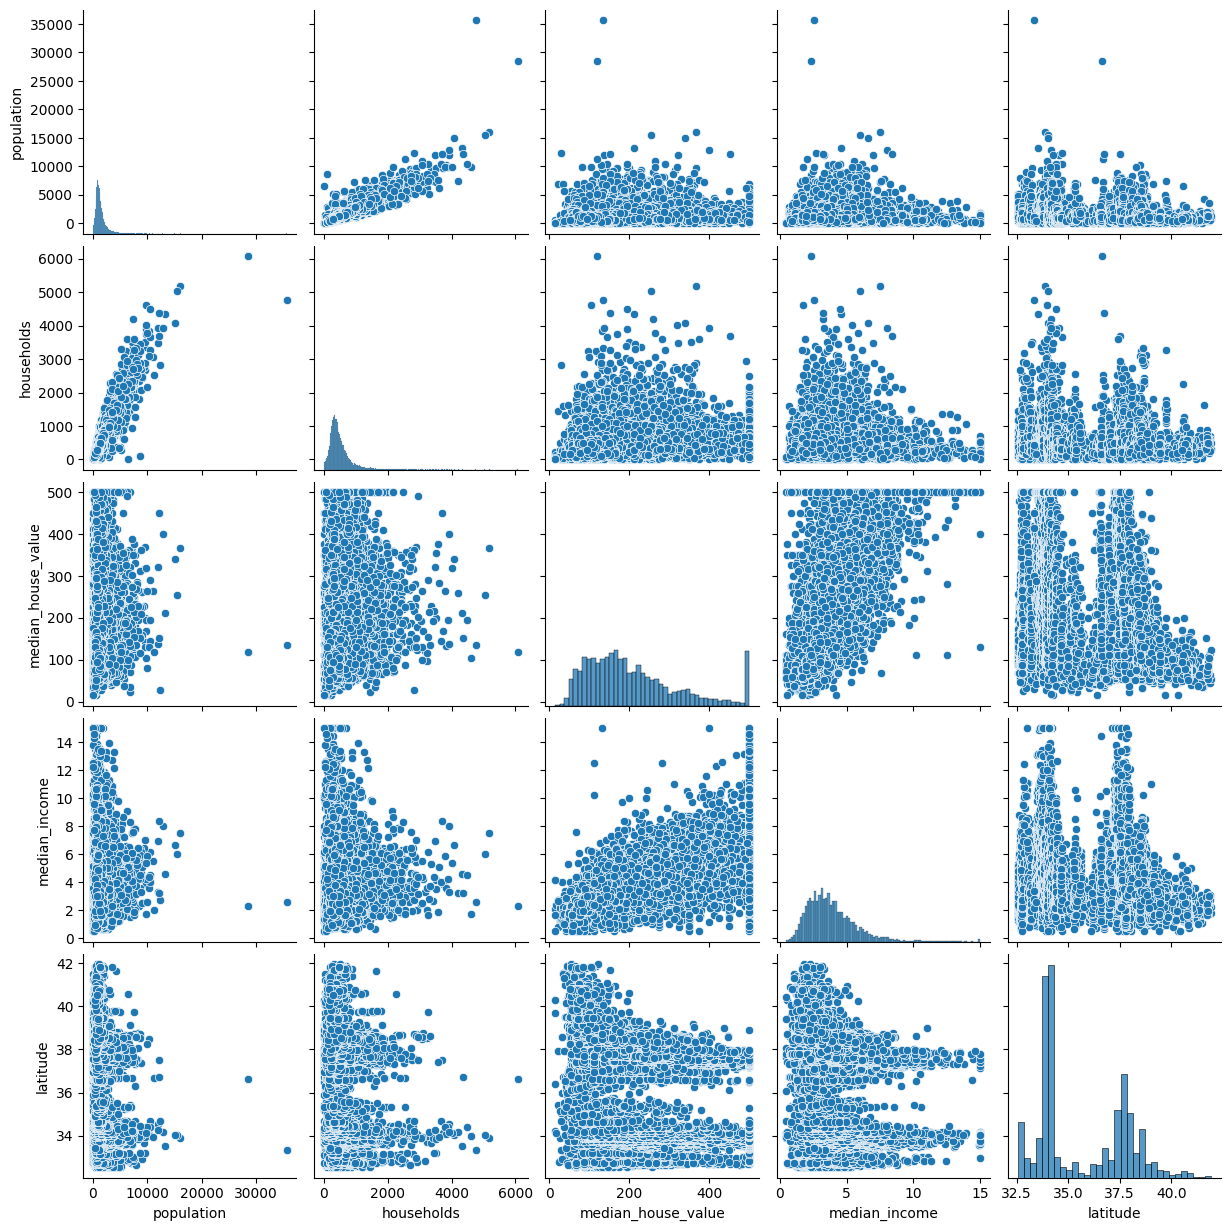

In [6]:
# cols = ['total_rooms', 'median_income', 'median_house_value']  # you are welcome to plot more features
cols = ['population', 'households', 'median_house_value', 'median_income', 'latitude']
sns.pairplot(training_df[cols], height=2.5);
plt.show()

## Build a Correlation Matrix
Furthermore, we can plot the correlation between the features as a heatmap.

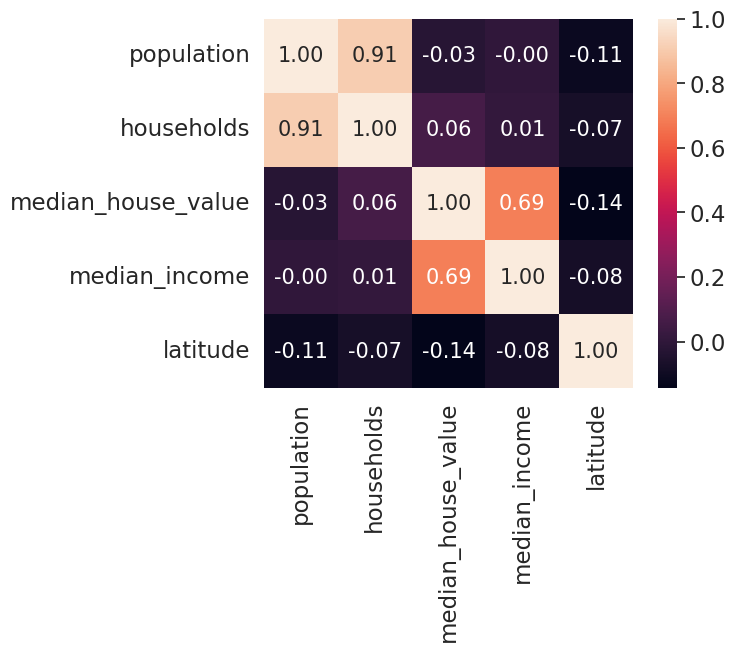

In [7]:
cmatrix = np.corrcoef(training_df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cmatrix, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.show()


## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds a randomly-initialized model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass.

<!--- Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the following headline to see the code that builds and trains a model. -->

In [8]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  # model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate)
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  # trained_weight = model.get_weights()[0]
  trained_weight = model.get_weights()[0][0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


## Define plotting functions

The following [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) functions create the following plots:

*  a scatter plot of the feature vs. the label, and a line showing the output of the trained model
*  a loss curve

You may optionally double-click the headline to see the matplotlib code, but note that writing matplotlib code is not an important part of learning ML programming.
As an aside, matplotlib can be instrumental in creating professional plots for theses and reseaerch papers and articles.

In [9]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Call the model functions

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label). For example, real-life home-value prediction models typically rely on hundreds of features and synthetic features. However, this model relies on only one feature. For now, you'll arbitrarily use `total_rooms` as that feature.

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3628955.0000 - root_mean_squared_error: 1782.1233
Epoch 2/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27145.3418 - root_mean_squared_error: 164.7397
Epoch 3/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 28110.3730 - root_mean_squared_error: 167.6371
Epoch 4/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27824.1191 - root_mean_squared_error: 166.7539
Epoch 5/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25757.0859 - root_mean_squared_error: 160.4541
Epoch 6/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25059.9688 - root_mean_squared_error: 158.2868
Epoch 7/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24746.1758 - root_mean_squared_error: 157.2962
Epoch 8/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23881.5977 - root_mean_squared_error: 154.5146
Epoch 9/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 23604.9727 - root_mean_squared_error: 153.6152
Epoch 10/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2

/tmp/ipython-input-909153421.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\nThe learned weight for your model is %.4f" % weight)
/tmp/ipython-input-909153421.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("The learned bias for your model is %.4f\n" % bias )


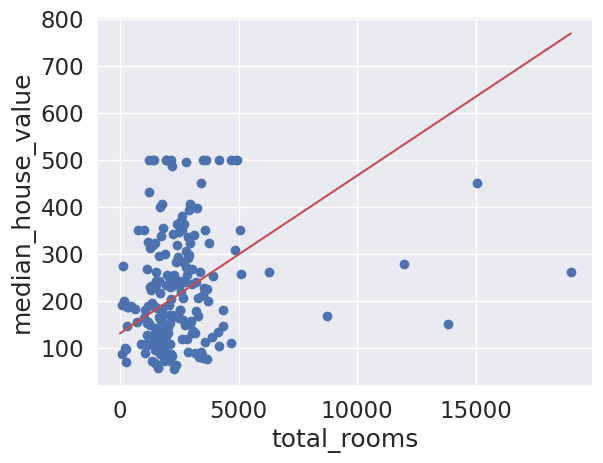

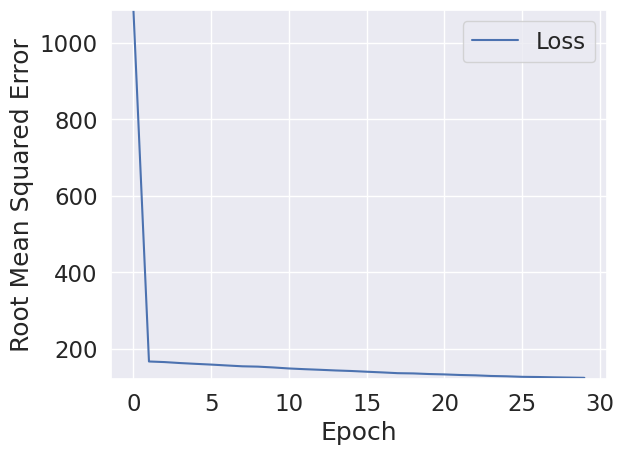

In [10]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label= "median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based
# solely on total_rooms.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

A certain amount of randomness plays into training a model. Consequently, you'll get different results each time you train the model. That said, given the dataset and the hyperparameters, the trained model will generally do a poor job describing the feature's relation to the label.

## Use the model to make predictions

You can use the trained model to make predictions. In practice, [you should make predictions on examples that are not used in training](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data). However, for this exercise, you'll just work with a subset of the same training dataset. A later Colab exercise will explore ways to make predictions on examples not used in training.

First, run the following code to define the house prediction function:

In [11]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

Now, invoke the house prediction function on 10 examples:

In [12]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             196
 3400     92             245
 3677     69             254
 2202     62             205
 2403     80             211
 5652    295             321
 3318    500             242
 2552    342             216
 1364    118             176
 3468    128             247


### Task 2: Judge the predictive power of the model

Look at the preceding table. How close is the predicted value to the label value?  In other words, does your model accurately predict house values?

In [13]:
#@title Double-click to view the answer.

# Most of the predicted values differ significantly
# from the label value, so the trained model probably
# doesn't have much predictive power. However, the
# first 10 examples might not be representative of
# the rest of the examples.

## Task 3: Try a different feature

The `total_rooms` feature had only a little predictive power. Would a different feature have greater predictive power?  Try using `population` as the feature instead of `total_rooms`.

Note: When you change features, you might also need to change the hyperparameters.

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5264433.5000 - root_mean_squared_error: 2173.2898
Epoch 2/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3921481.7500 - root_mean_squared_error: 1966.8419
Epoch 3/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4279163.5000 - root_mean_squared_error: 2001.1293
Epoch 4/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3641813.5000 - root_mean_squared_error: 1900.1312
Epoch 5/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3055768.2500 - root_mean_squared_error: 1742.2340
Epoch 6/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2956643.5000 - root_mean_squared_error: 1697.2109
Epoch 7/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7051603.5000 - root_mean_squared_error: 2393.1648
Epoch 8/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3064921.7500 - root_mean_squared_error: 1747.0254
Epoch 9/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3100941.2500 - root_mean_squared_error: 1755.6216
Epoch 10/30
142/142 ━

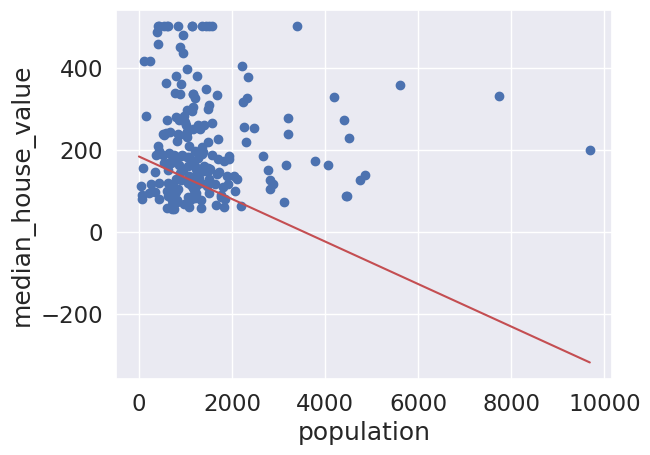

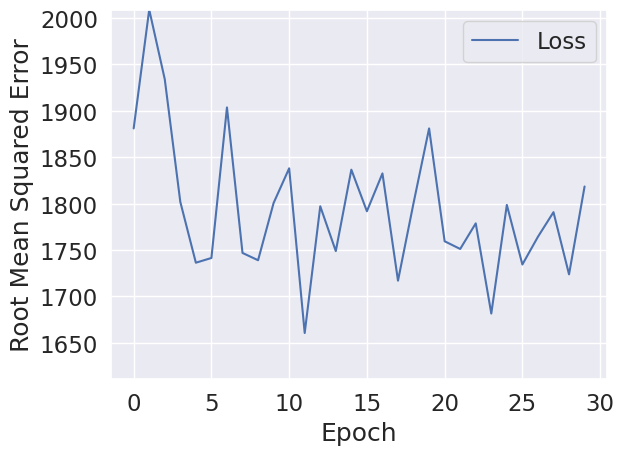

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             117
 1867     92              87
 2191     69              70
 1052     62             129
 1647     80              98
 2312    295              64
 1604    500             101
 1066    342             128
  338    118             166
 1604    128             101
 1200    187             122
  292     80             168
 2014    112              79
 1817     95              90
 1328     69             115


In [14]:
my_feature = "population"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 2.0
epochs = 30
batch_size = 120

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

Did `population` produce better predictions than `total_rooms`?

In [15]:
#@title Double-click to view the answer.

# Training is not entirely deterministic, but population
# typically converges at a slightly higher RMSE than
# total_rooms.  So, population appears to be about
# the same or slightly worse at making predictions
# than total_rooms.

## Task 4: Define a synthetic feature

You have determined that `total_rooms` and `population` were not useful features.  That is, neither the total number of rooms in a neighborhood nor the neighborhood's population successfully predicted the median house price of that neighborhood. Perhaps though, the *ratio* of `total_rooms` to `population` might have some predictive power. That is, perhaps block density relates to median house value.

To explore this hypothesis, do the following:

1. Create a [synthetic feature](https://developers.google.com/machine-learning/glossary/#synthetic_feature) that's a ratio of `total_rooms` to `population`. (If you are new to pandas DataFrames, please study the [Pandas DataFrame Ultraquick Tutorial](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en).)
2. Tune the three hyperparameters.
3. Determine whether this synthetic feature produces
   a lower loss value than any of the single features you
   tried earlier in this exercise.

Epoch 1/24


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 46652.7695 - root_mean_squared_error: 215.7045
Epoch 2/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22298.7070 - root_mean_squared_error: 149.1256
Epoch 3/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15745.0166 - root_mean_squared_error: 125.3213
Epoch 4/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15038.7656 - root_mean_squared_error: 122.5774
Epoch 5/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14129.9463 - root_mean_squared_error: 118.7621
Epoch 6/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15053.9619 - root_mean_squared_error: 122.5245
Epoch 7/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14589.1309 - root_mean_squared_error: 120.7315
Epoch 8/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13553.4102 - root_mean_squared_error: 116.3377
Epoch 9/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13696.6162 - root_mean_squared_error: 116.9444
Epoch 10/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

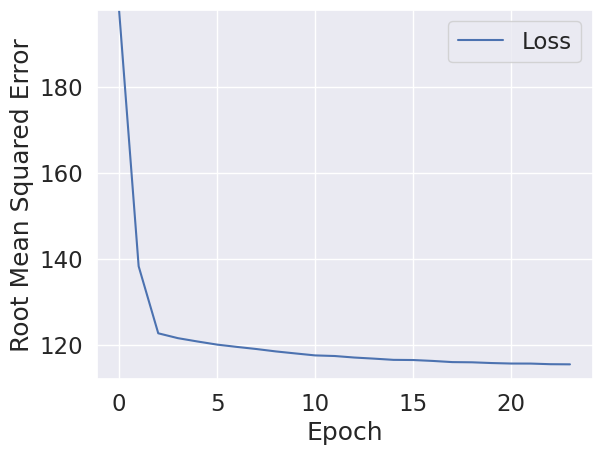

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             189
    2     92             201
    2     69             195
    2     62             212
    1     80             187
    2    295             225
    2    500             211
    2    342             223
    4    118             287
    2    128             214
    2    187             224
    3     80             234
    2    112             225
    2     95             219
    2     69             211


In [17]:
# Define a synthetic feature named rooms_per_person
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"] # write your code here.

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = ?
epochs = ?
batch_size = ?

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

Epoch 1/24


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46687.0859 - root_mean_squared_error: 215.7760
Epoch 2/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21341.3398 - root_mean_squared_error: 146.0158
Epoch 3/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14258.8818 - root_mean_squared_error: 119.4013
Epoch 4/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14730.2041 - root_mean_squared_error: 121.1686
Epoch 5/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15211.9541 - root_mean_squared_error: 123.2844
Epoch 6/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13559.3193 - root_mean_squared_error: 116.3645
Epoch 7/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13849.0195 - root_mean_squared_error: 117.5750
Epoch 8/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14464.3467 - root_mean_squared_error: 120.2323
Epoch 9/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14181.0117 - root_mean_squared_error: 119.0646
Epoch 10/24
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/

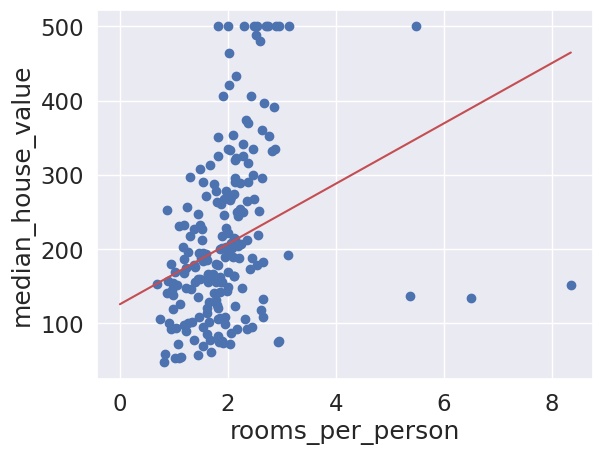

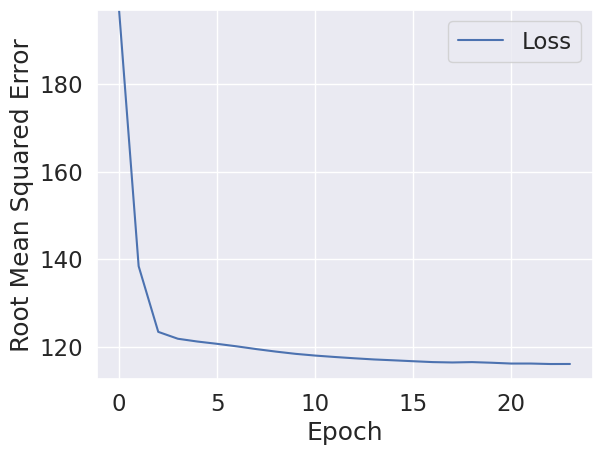

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             188
    2     92             200
    2     69             194
    2     62             211
    1     80             185
    2    295             225
    2    500             210
    2    342             223
    4    118             290
    2    128             214
    2    187             224
    3     80             235
    2    112             225
    2     95             219
    2     69             210


In [18]:
#@title Double-click to view a possible solution to Task 4.

# Define a synthetic feature
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)

Based on the loss values, this synthetic feature produces a better model than the individual features you tried in Task 2 and Task 3. However, the model still isn't creating great predictions.

## Task 5. Find feature(s) whose raw values correlate with the label

So far, we've relied on trial-and-error to identify possible features for the model.  Let's rely on statistics instead.

A **correlation matrix** indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

  * `1.0`: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
  * `-1.0`: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
  * `0.0`: no correlation; the two columns [are not linearly related](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

The following code cell generates the correlation matrix for attributes of the California Housing Dataset:

In [19]:
# Generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


The correlation matrix shows nine potential features (including a synthetic
feature) and one label (`median_house_value`).  A strong negative correlation or strong positive correlation with the label suggests a potentially good feature.  

**Your Task:** Determine which of the nine potential features appears to be the best candidate for a feature?

In [ ]:
#@title Double-click here for the solution to Task 5

# The median_income correlates 0.7 with the label
# (median_house_value), so median_income might be a
# good feature. The other seven potential features
# all have a correlation relatively close to 0.

# If time permits, try median_income as the feature
# and see whether the model improves.

Correlation matrices don't tell the entire story. In later exercises, you'll find additional ways to unlock predictive power from potential features.

**Note:** Using median_income as a feature may raise some ethical and fairness issues.